In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [126]:
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\mymoviedb.csv",lineterminator='\n').head(5) #To import data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       5 non-null      object 
 1   Title              5 non-null      object 
 2   Overview           5 non-null      object 
 3   Popularity         5 non-null      float64
 4   Vote_Count         5 non-null      int64  
 5   Vote_Average       5 non-null      float64
 6   Original_Language  5 non-null      object 
 7   Genre              5 non-null      object 
 8   Poster_Url         5 non-null      object 
dtypes: float64(2), int64(1), object(6)
memory usage: 492.0+ bytes


In [127]:
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\mymoviedb.csv",lineterminator='\n')
df.head(5)


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [128]:
df['Genre'].head(5)


0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [129]:
df['Release_Date'] = pd.to_datetime(df['Release_Date']) 
print(df['Release_Date'].dtype)


datetime64[ns]


In [130]:
df['Release_Date']=df['Release_Date'].dt.year # to see only year
df['Release_Date'].dtype

dtype('int32')

In [131]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns

In [132]:
cols = ['Overview','Original_Language','Poster_Url']


In [133]:
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [134]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**Categorizing Vote_Average column** 

We would cut the Vote_Average values and make  4 categories: ```
popular``` ``` average ```, ```below_avg ```, ```not_popular``` to discribe it more using ```catigorize_col()``` function provided avove.

In [135]:
def catigorize_cols(df , col ,labels): # Creating user define functions
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']
    ]
    df[col] = pd.cut(df[col],edges, labels= labels,duplicates = "drop")
    return df

In [136]:
labels = ['not_popular','below_avg', 'average','popular']
catigorize_cols( df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [137]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [138]:
# count the values of each categorary
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [139]:
df.dropna(inplace=True) # remove all Remove Nan value in the DataFrame
df.isna().sum() # Check the  Nan in the  columns.

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

 We'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [140]:
df['Genre']= df['Genre'].str.split(', ')
df=df.explode("Genre").reset_index(drop= True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


**Casting Column into Category**

In [141]:
df['Genre'] = df['Genre'].astype('category') #astype: To convert column into category.
df['Genre'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [143]:
df.nunique() # Unique value 

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [144]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# **DATA VISUALIZATION**

In [145]:
sns.set_style('whitegrid') # For Better Visualization

## What is the most frequent genre of movies released on Netflix?

In [146]:
df["Genre"].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

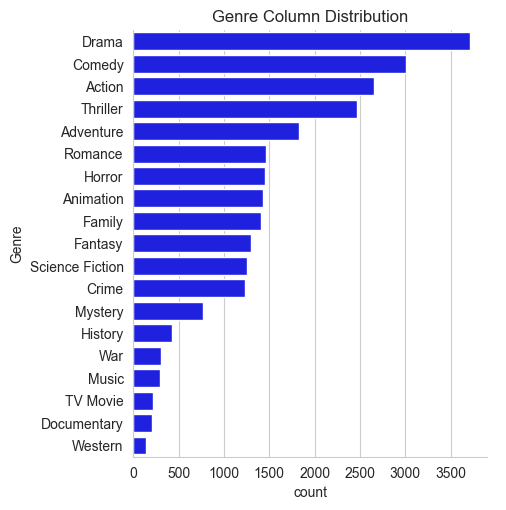

In [147]:
sns.catplot(y="Genre",data=df,kind='count',order= df['Genre'].value_counts().index,color="blue")
plt.title('Genre Column Distribution')
plt.show()

## Which has highest votes in vote avg column?

In [148]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


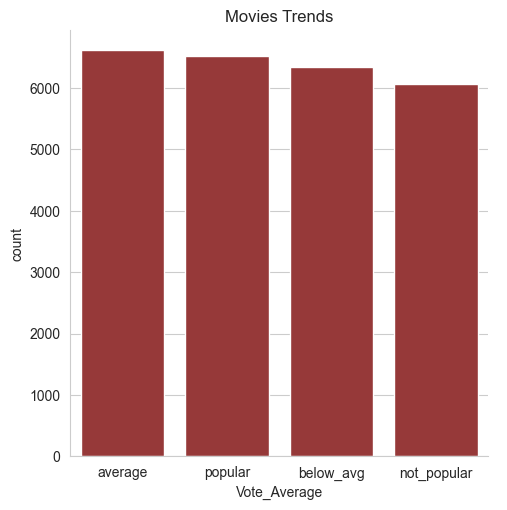

In [149]:
sns.catplot(x='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='brown')
plt.title('Movies Trends')
plt.show()

## what movies got the highest popularity? What's its genre?

In [150]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [151]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


## What movies got the lowet Popularity? What its Genre?

In [152]:
df[df['Popularity']==df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


## Which year has the most filmed movies?

In [153]:
df['Release_Date'].dtypes

dtype('int32')

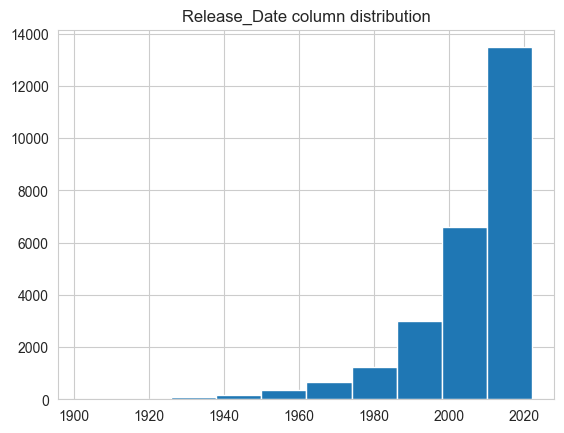

In [154]:
df['Release_Date'].hist()
plt.title("Release_Date column distribution")
plt.show()